In [3]:
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV

In [17]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
import warnings
warnings.simplefilter('ignore')

In [8]:
fold='../prep/'

In [9]:
dn=pd.read_csv(fold+'proc_no_pert.csv',index_col=None)
dn["gia"]=dn.ngi>0
dl=pd.read_csv(fold+'proc_lo_pert.csv',index_col=None)
dl["gia"]=dl.ngi>0
dh=pd.read_csv(fold+'proc_hi_pert.csv',index_col=None)
dh["gia"]=dh.ngi>0

In [10]:
dn.head()

,Unnamed: 0,ident,com,nplanets,massbudget,massefficiency,sigmag0,md,rc,ms,metal,taugas,qest,ngi,mtr,apert,gia
0,0,3.0,1.081461,10.0,10770.309627,0.576981,90.793337,0.056,29.539343,0.880114,0.328146,1.644711e+06,8.421395,4.0,12.004623,0.0,True
1,1,5.0,2.932894,12.0,17.882769,0.000488,102.431593,0.110,38.977428,1.075269,-0.150160,1.014449e+06,5.464831,0.0,17.882769,0.0,False
2,2,6.0,0.110789,12.0,2422.342359,0.060559,75.740878,0.120,47.343380,0.861595,0.021273,1.790533e+06,4.412694,1.0,29.771089,0.0,True
3,3,8.0,5.740174,9.0,8.166382,0.000163,62.737337,0.150,58.158928,1.076658,-0.282408,6.017040e+06,4.704798,0.0,8.166382,0.0,False
4,4,13.0,0.172211,13.0,2905.457535,0.051273,178.830700,0.170,36.672222,1.206445,-0.174039,3.956708e+06,3.998513,1.0,14.220447,0.0,True


In [11]:
dnt=dn[~dn["gia"]]
dlt=dl[~dl["gia"]]
dht=dh[~dh["gia"]]
dng=dn[dn["gia"]]
dlg=dl[dl["gia"]]
dhg=dh[dh["gia"]]

In [14]:
dng['logeff']=np.log10(dng.massefficiency)
dlg['logeff']=np.log10(dlg.massefficiency)
dhg['logeff']=np.log10(dhg.massefficiency)
dnt['logeff']=np.log10(dnt.massefficiency)
dlt['logeff']=np.log10(dlt.massefficiency)
dht['logeff']=np.log10(dht.massefficiency)
dn['logeff']=np.log10(dn.massefficiency)
dl['logeff']=np.log10(dl.massefficiency)
dh['logeff']=np.log10(dh.massefficiency)
dn['logcom']=np.log10(dn.com)
dl['logcom']=np.log10(dl.com)
dh['logcom']=np.log10(dh.com)
dng['logcom']=np.log10(dng.com)
dlg['logcom']=np.log10(dlg.com)
dhg['logcom']=np.log10(dhg.com)
dnt['logcom']=np.log10(dnt.com)
dlt['logcom']=np.log10(dlt.com)
dht['logcom']=np.log10(dht.com)

<AxesSubplot:xlabel='ngi'>

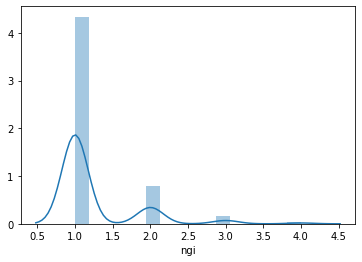

In [18]:
sns.distplot(dng.ngi)


(array([2.71144279, 0.        , 0.        , 0.49751244, 0.        ,
        0.        , 0.09950249, 0.        , 0.        , 0.02487562]),
 array([1. , 1.3, 1.6, 1.9, 2.2, 2.5, 2.8, 3.1, 3.4, 3.7, 4. ]),
 <BarContainer object of 10 artists>)

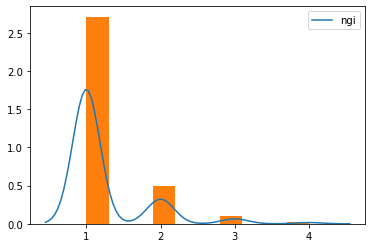

In [25]:
sns.kdeplot(dng.ngi,bw='silverman')
plt.hist(dng.ngi, density=True)

(array([2.71144279, 0.        , 0.        , 0.49751244, 0.        ,
        0.        , 0.09950249, 0.        , 0.        , 0.02487562]),
 array([1. , 1.3, 1.6, 1.9, 2.2, 2.5, 2.8, 3.1, 3.4, 3.7, 4. ]),
 <BarContainer object of 10 artists>)

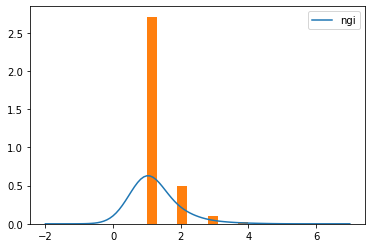

In [28]:
sns.kdeplot(dng.ngi,bw=1)
plt.hist(dng.ngi, density=True)

In [15]:
print("***************************************")
print("Total systems                  : "+str(len(dn)))
print("***************************************")
print("Total planets - no             : "+str(dn.nplanets.sum().astype(int)))
print("Giant planets - no             : "+str(dn.ngi.sum().astype(int)))
print("Systems with giant planets - no: "+str(dn.gia.sum()))
print("***************************************")

print("Total planets - lo             : "+str(dl.nplanets.sum().astype(int)))
print("Giant planets - lo             : "+str(dl.ngi.sum().astype(int)))
print("Systems with giant planets - lo: "+str(dl.gia.sum()))
print("***************************************")
print("Total planets - hi             : "+str(dh.nplanets.sum().astype(int)))
print("Giant planets - hi             : "+str(dh.ngi.sum().astype(int)))
print("Systems with giant planets - hi: "+str(dh.gia.sum()))
print("***************************************")


***************************************
Total systems                  : 1221
***************************************
Total planets - no             : 15887
Giant planets - no             : 330
Systems with giant planets - no: 268
***************************************
Total planets - lo             : 15732
Giant planets - lo             : 374
Systems with giant planets - lo: 306
***************************************
Total planets - hi             : 15441
Giant planets - hi             : 388
Systems with giant planets - hi: 309
***************************************


In [34]:
x=dng.ngi
grid = GridSearchCV(KernelDensity(),
                {'bandwidth': np.linspace(x.min(),x.max()/10,30)},
                cv=20) # 20-fold cross-validation
grid.fit(x[:, None])
print(grid.best_params_)


{'bandwidth': 0.4}


In [39]:
from scipy.stats import gaussian_kde
kde = gaussian_kde(x)
f = kde.covariance_factor()
bw = f * x.std()
f

0.32686847827492765

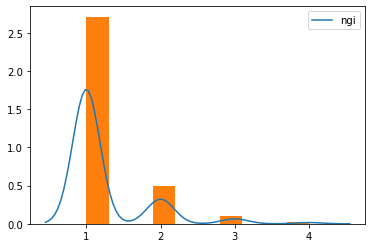

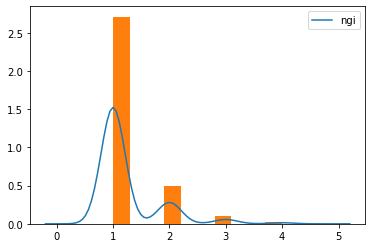

In [43]:
sns.kdeplot(dng.ngi,bw='silverman')
plt.hist(dng.ngi, density=True)
plt.show()
sns.kdeplot(dng.ngi,bw=0.4)
plt.hist(dng.ngi, density=True)
plt.show()

<AxesSubplot:xlabel='md'>

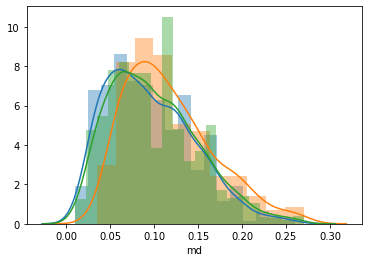

In [47]:
var='md'
sns.distplot(dnt[var])
sns.distplot(dng[var])
sns.distplot(dn[var])


In [ ]:
var='md'
sns.distplot(dnt[var])
sns.distplot(dng[var])
sns.distplot(dn[var])


In [73]:
x=dn.md/dn.ms
grid = GridSearchCV(KernelDensity(),
                {'bandwidth': np.linspace(0.00001, 0.5, 30)},
                cv=20) # 20-fold cross-validation
grid.fit(x[:, None])
print(grid.best_params_)

{'bandwidth': 0.01725103448275862}


(array([3.05198154, 6.76470135, 7.70861316, 6.98494744, 5.00273262,
        4.71955908, 2.39124327, 0.88098436, 0.62927454, 0.28317354]),
 array([0.0097 , 0.03573, 0.06176, 0.08779, 0.11382, 0.13985, 0.16588,
        0.19191, 0.21794, 0.24397, 0.27   ]),
 <BarContainer object of 10 artists>)

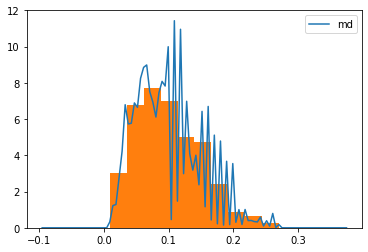

In [71]:
sns.kdeplot(dn.md,bw=0.035)
plt.hist(dn.md, density=True)

In [52]:
kde = gaussian_kde(x)
f = kde.covariance_factor()
bw = f * x.std()
f

0.2413553150811351

In [5]:
def uni_kde(x,y,tickno=5,nlev=30):
    x_grid=np.around(np.arange(x.min(),x.max(),0.1),2)
    y_grid=np.linspace(y.min(),y.max(),len(x_grid))
    conv=(x.max()-x.min())/(y.max()-y.min())
    yori=y
    y=y*conv
    y_grid=y_grid*conv
    grid = GridSearchCV(KernelDensity(),
                    {'bandwidth': np.linspace(x.min(),x.max()/10,30)},
                    cv=20) # 20-fold cross-validation
    grid.fit(np.vstack([x,y]).T)
    print(grid.best_params_)
    X, Y = np.meshgrid(x_grid, y_grid)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    kde2d = grid.best_estimator_
    pdf2d = np.exp(kde2d.score_samples(xy)).reshape(X.shape)
    plt.figure(figsize=(5,5))
    levels = np.linspace(0, pdf2d.max(), nlev)
    plt.contourf(X, Y, pdf2d, levels=levels, cmap=plt.cm.Reds)
    tickno=5
    old_ticks=np.linspace(y.max(), y.min(), tickno)
    major_ticks = 10**np.linspace(yori.max(), yori.min(), tickno)
    myticks=[]
    for i in major_ticks:
        myticks+=["%.e"%i]
    e=plt.yticks(old_ticks,myticks) 

{'bandwidth': 1.2586206896551724}


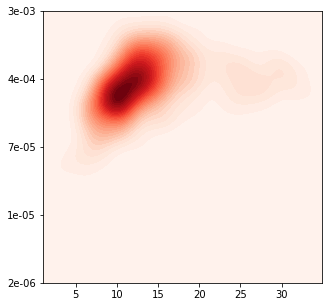

In [16]:
uni_kde(dnt.nplanets,dnt.logeff)